In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

# 화질 개선

## 잡음 제거

### 이동평균법(mean)

In [2]:
import numpy as np

def mean_blur(img):
    A = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape
    for y in range(height):
        for x in range(width):
            try :
                S = 1*img[y-1, x-1] + img[y-1, x] + img[y-1, x+1] \
                    + img[y  , x-1] + img[y  , x] + img[y  , x+1] \
                    + img[y+1, x-1] + img[y+1, x] + img[y+1, x+1]
                S = S/9
                if S>255:
                    A[y,x] = 255
                elif S<0:
                    A[y,x] = 0
                else:
                    A[y,x] = int(S)
            except:
                pass
    return A

In [3]:
import cv2

lena_gray = cv2.imread("images/lena_std_5.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Lena", lena_gray)
cv2.imshow("Mean Blur", mean_blur(lena_gray))
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.blur()

In [4]:
import cv2

lena_gray = cv2.imread("images/lena_std_5.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Lena", lena_gray)
cv2.imshow("Mean Blur", cv2.blur(lena_gray, (3,3)))
cv2.waitKey()
cv2.destroyAllWindows()

### 메디안 필터

In [5]:
import numpy as np

def median_blur(img):
    A = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape[:2]
    for y in range(height):
        for x in range(width):
            try :
                S = [img[y-1, x-1], img[y-1, x], img[y-1, x+1],
                     img[y  , x-1], img[y  , x], img[y  , x+1],
                     img[y+1, x-1], img[y+1, x], img[y+1, x+1] ]
                A[y, x] = np.median(S)
            except:
                pass
    return A

In [6]:
import cv2

lena_gray = cv2.imread("images/lena_std_5.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("Lena", lena_gray)
cv2.imshow("Median Blur", median_blur(lena_gray))
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
import cv2
lena_gray = cv2.imread("images/lena_std_5.jpg", cv2.IMREAD_GRAYSCALE)
result = cv2.medianBlur(lena_gray, 3)
cv2.imshow("Lena", lena_gray)
cv2.imshow("Median filter", result)
cv2.waitKey()
cv2.destroyAllWindows()

### scipy의 median_filter()

In [8]:
from scipy import ndimage
import cv2
lena_gray = cv2.imread("images/lena_std_5.jpg", cv2.IMREAD_GRAYSCALE)
result = ndimage.median_filter(lena_gray, size=3)
cv2.imshow("Lena", lena_gray)
cv2.imshow("Median filter", result)
cv2.waitKey()
cv2.destroyAllWindows()

### 가우시안 블러

In [9]:
def gaussian_blur(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape
    for y in range(height):
        for x in range(width):
            try :
                T =  1*img[y-1, x-1] +  2*img[y-1, x] +  1*img[y-1, x+1] \
                  +  2*img[y  , x-1] +  4*img[y  , x] +  2*img[y  , x+1] \
                  +  1*img[y+1, x-1] +  2*img[y+1, x] +  1*img[y+1, x+1] 
                img_[y,x] = int(T/16)
            except:
                pass
    return img_

In [10]:
lena_gray = cv2.imread("images/lena_std_5.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("Lena", lena_gray)
cv2.imshow("Gaussian Blur", gaussian_blur(lena_gray))
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.GaussianBlur & cv2.bilateralFilter()

In [11]:
import cv2

lena_gray = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Bilateral", cv2.bilateralFilter(lena_gray, 9, 75, 75))
cv2.imshow("Gaussian", cv2.GaussianBlur(lena_gray, (5, 5), 75))
cv2.waitKey()
cv2.destroyAllWindows()

## 모폴로지 연산

### 수축

#### contraction

In [12]:
def contraction(img_in):
    height, width = img_in.shape
    img_out = np.zeros(img_in.shape, np.uint8)
    for y in range(1, height-1):
        for x in range(1, width-1):
            img_out[y,x] = img_in[y,x]
            if img_in[y-1,x-1]==0:
                img_out[y,x] = 0
            if img_in[y-1,x  ]==0:
                img_out[y,x] = 0
            if img_in[y-1,x+1]==0:
                img_out[y,x] = 0
                
            if img_in[y  ,x-1]==0:
                img_out[y,x] = 0
            if img_in[y  ,x+1]==0:
                img_out[y,x] = 0
                
            if img_in[y+1,x-1]==0:
                img_out[y,x] = 0
            if img_in[y+1,x  ]==0:
                img_out[y,x] = 0
            if img_in[y+1,x+1]==0:
                img_out[y,x] = 0
    return img_out

### 팽창

In [13]:
def expansion(img_in):
    height, width = img_in.shape
    img_out = np.zeros(img_in.shape, np.uint8)
    for y in range(1, height-1):
        for x in range(1, width-1):
            img_out[y,x] = img_in[y,x]
            if img_in[y-1,x-1]==255:
                img_out[y,x] = 255
            if img_in[y-1,x  ]==255:
                img_out[y,x] = 255
            if img_in[y-1,x+1]==255:
                img_out[y,x] = 255
                
            if img_in[y  ,x-1]==255:
                img_out[y,x] = 255
            if img_in[y  ,x+1]==255:
                img_out[y,x] = 255
                
            if img_in[y+1,x-1]==255:
                img_out[y,x] = 255
            if img_in[y+1,x  ]==255:
                img_out[y,x] = 255
            if img_in[y+1,x+1]==255:
                img_out[y,x] = 255
    return img_out

In [14]:
img5 = cv2.imread("images/five.png", cv2.IMREAD_GRAYSCALE)
cv2.imshow("5", img5)
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
img5 = cv2.imread("images/five.png", cv2.IMREAD_GRAYSCALE)

img5_cont = contraction(img5)
img5_exp = expansion(img5_cont)

cv2.imshow("5", img5)
cv2.imshow("contraction", img5_cont)
cv2.imshow("expansion", img5_exp)
cv2.waitKey()
cv2.destroyAllWindows()

### 열기

In [16]:
img5 = cv2.imread("images/five.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow("5", img5)
cv2.imshow("expansion", expansion(img5))
cv2.imshow("contraction", contraction(expansion(img5)))
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.morphologyEx()

In [17]:
j = cv2.imread("images/j.png", cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0,-1,-1],[1,1,-1],[0,1,0]], dtype="int")
cv2.imshow("MORPH_HITMISS", np.c_[j, cv2.morphologyEx(j, cv2.MORPH_HITMISS, kernel)])
cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
import cv2 as cv
import numpy as np
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")
kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")
output_image = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel)
rate = 50
kernel = (kernel + 1) * 127
kernel = np.uint8(kernel)
kernel = cv.resize(kernel, None, fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
cv.imshow("kernel", kernel)
cv.moveWindow("kernel", 0, 0)
input_image = cv.resize(input_image, None, fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
cv.imshow("Original", input_image)
cv.moveWindow("Original", 0, 200)
output_image = cv.resize(output_image, None , fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
cv.imshow("Hit or Miss", output_image)
cv.moveWindow("Hit or Miss", 500, 200)
cv.waitKey(0)
cv.destroyAllWindows()

## 화질 개선

In [19]:
import cv2
import matplotlib.pyplot as plt

### 히스토그램과 밝기값 조절

#### 히스토그램

In [20]:
def histogram(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            hist[img[y,x]] = hist[img[y,x]] + 1
    return hist

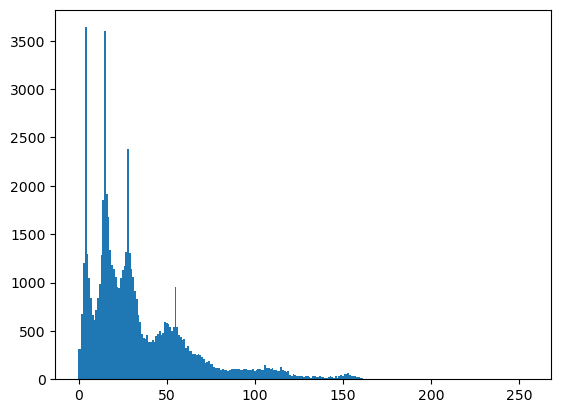

In [21]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
plt.bar(x=range(256), height=histogram(img), width=1)
plt.show()

In [22]:
img = cv2.imread("images/couple2.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Image", img)
cv2.waitKey()
cv2.destroyAllWindows()

#### 밝기값 조절

In [23]:
def brightness(img, threshold=0):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            temp = img[y][x] + threshold;
            if (temp > 255):
                img_[y][x] = 255
            elif(temp < 0):
                img_[y][x] = 0
            else:
                img_[y][x] = temp
    return img_

In [24]:
img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = brightness(img, threshold=100)
cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

(0.0, 256.0)

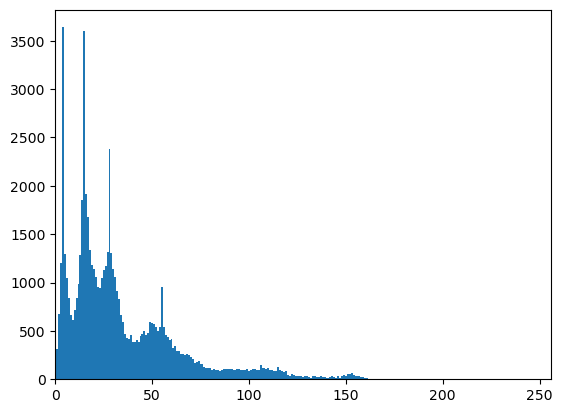

In [25]:
import matplotlib.pyplot as plt

plt.bar(x=list(range(256)), height=histogram(img), width=1)
plt.xlim([0,256])

(0.0, 256.0)

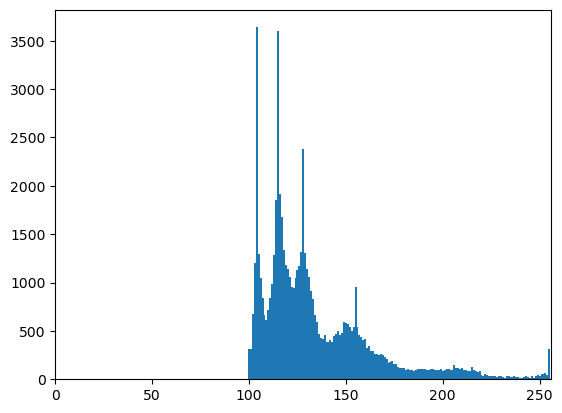

In [26]:
import matplotlib.pyplot as plt

img2 = brightness(img, threshold=100)
plt.bar(x=list(range(256)), height=histogram(img2), width=1)
plt.xlim([0,256])

### 콘트라스트 강조

In [27]:
def contrast(img, low=0, high=255):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            temp = (int)((255/(high-low)) * (img[y][x]-low));
            if (temp > 255):
                img_[y][x] = 255
            elif(temp < 0):
                img_[y][x] = 0
            else:
                img_[y][x] = temp
    return img_

In [28]:
img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 0, 160)
cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.normalize

In [29]:
img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
height, width = img.shape
for y in range(height):
    for x in range(width):
        if img[y,x]>160:
            img[y,x]=160
            
img2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
import cv2
import matplotlib.pyplot as plt

def img_pro2(func, img, *args, show=True, win=False, **kwargs):
    img_ = func(img, *args, **kwargs)
    if show:
        if win:
            cv2.imshow("Image", img_)
            cv2.waitKey()
            cv2.destroyAllWindows()
        else:
            fig, axes = plt.subplots(1,2)
            axes[0].imshow(img, cmap="gray")
            axes[0].axis("off"); axes[0].set_title("origin")
            axes[1].imshow(img_, cmap="gray", interpolation=None)
            axes[1].axis("off"); axes[1].set_title("target")
    else:
        return img_

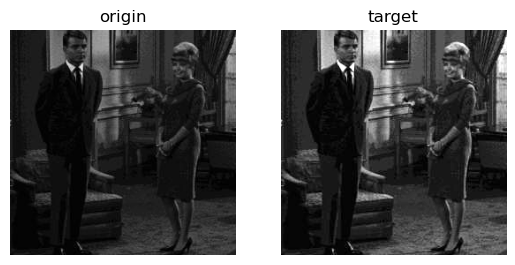

In [31]:
img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img_pro2(contrast, img, 0, 160)

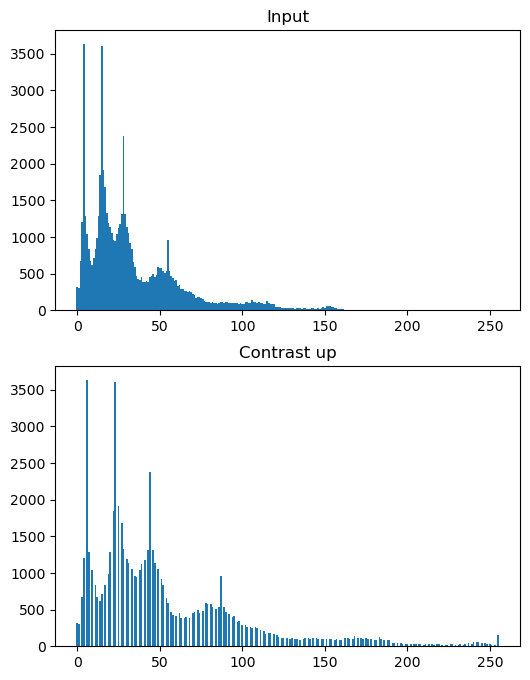

In [32]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 0, 160)

plt.figure(figsize=(6,8))
plt.subplot(211)
plt.bar(x=range(256), height=histogram(img), width=1)
plt.title("Input")
plt.subplot(212)
plt.bar(x=range(256), height=histogram(img2), width=1)
plt.title("Contrast up")
plt.show()

### 히스토그램 평활화(equalization)

#### 히스토그램 평활화 구현

In [33]:
def equalization(img):
    height, width = img.shape
    img_in = img.copy()
    img_out = np.zeros(img_in.shape, dtype=np.uint8)
    histogram = np.zeros(256, dtype=int) # 화소를 수를 저장해야 함
    sum_histo = np.zeros(256, dtype=int) # 히스토그램 누적합
    
    for y in range(height):
        for x in range(width):
            histogram[img_in[y,x]] = histogram[img_in[y,x]] + 1
    
    sum = 0
    scale_factor =  255 / (width * height)  # 정규화된 합을 계산하기 위함
    for i in range(256):
        sum = sum + histogram[i]
        sum_histo[i] = np.ceil(sum*scale_factor)
    
    for y in range(height):
        for x in range(width):
            img_out[y,x] = sum_histo[img_in[y][x]]
        
    return img_out

In [34]:
img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = equalization(img)
cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

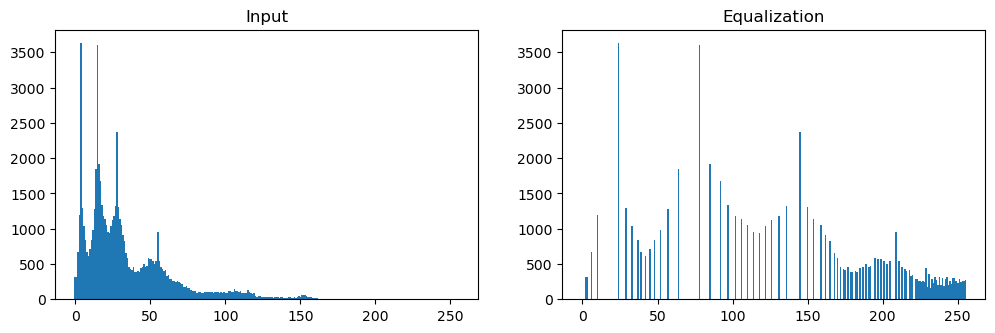

In [35]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = equalization(img)

plt.figure(figsize=(12,3.5))
plt.subplot(121)
plt.bar(x=range(256), height=histogram(img), width=1)
plt.title("Input")
plt.subplot(122)
plt.bar(x=range(256), height=histogram(img2), width=1)
plt.title("Equalization")
plt.show()

#### 넘파이를 이용한 히스토그램 평활화

In [36]:
def histogram(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            hist[img[y,x]] = hist[img[y,x]] + 1
    return hist

In [37]:
import numpy as np

def equalization2(img):
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    return cdf[img]

In [38]:
img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = equalization2(img)
cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

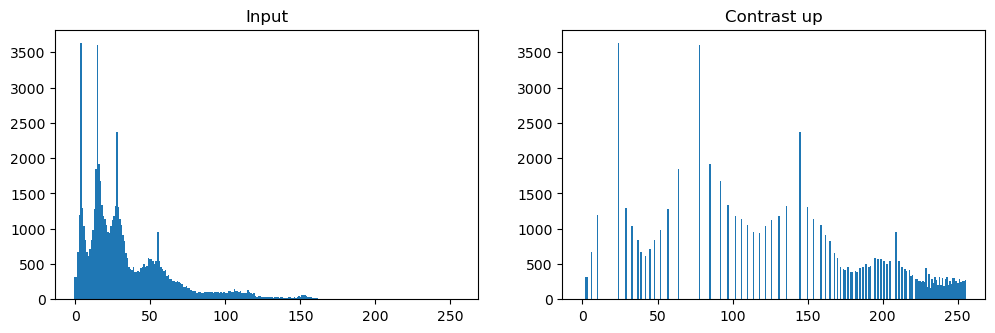

In [39]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = equalization(img)

plt.figure(figsize=(12,3.5))
plt.subplot(121)
plt.bar(x=range(256), height=histogram(img), width=1)
plt.title("Input")
plt.subplot(122)
plt.bar(x=range(256), height=histogram(img2), width=1)
plt.title("Contrast up")
plt.show()

#### cv2.equalizeHist()

In [40]:
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)

img2 = cv2.equalizeHist(img)
cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

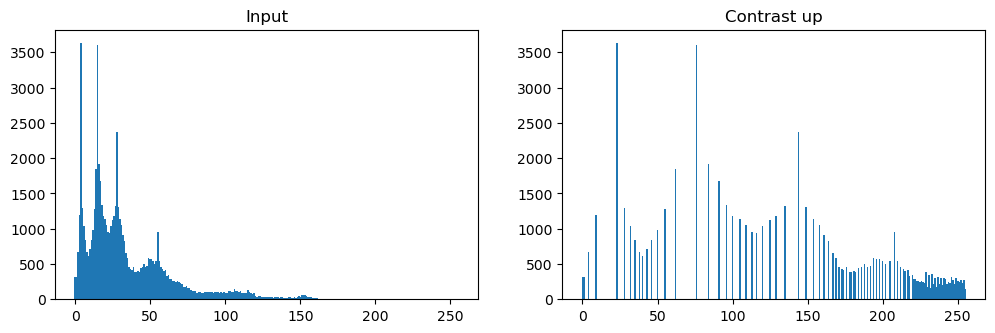

In [41]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.equalizeHist(img)

plt.figure(figsize=(12,3.5))
plt.subplot(121)
plt.bar(x=range(256), height=histogram(img), width=1)
plt.title("Input")
plt.subplot(122)
plt.bar(x=range(256), height=histogram(img2), width=1)
plt.title("Contrast up")
plt.show()

#### 누적 히스토그램 그래프

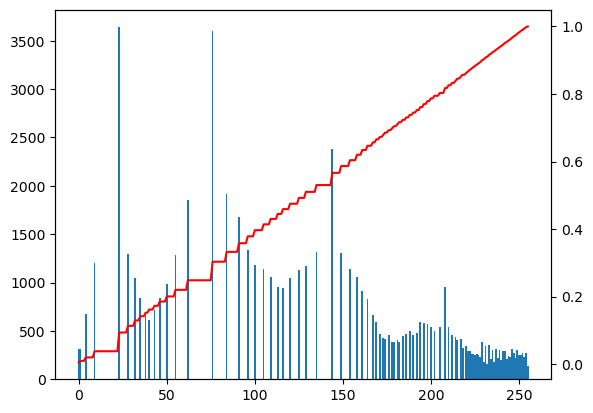

In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.equalizeHist(img)

hist = histogram(img2)

cumsum_hist = np.cumsum(hist)
sum_hist = np.sum(hist)
plt.bar(range(256), hist, width=1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist/sum_hist, 'r')
plt.show()

## 적응적 히스토그램 이퀄라이제이션

### cv2.createCLAHE()

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/tsukuba.png", cv2.IMREAD_GRAYSCALE)

img2 = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8,8))
img3 = clahe.apply(img)

cv2.imshow('Equalization vs. CLAHE', np.c_[img2, img3])
cv2.waitKey()
cv2.destroyAllWindows()

In [44]:
def histogram(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            hist[img[y,x]] = hist[img[y,x]] + 1
    return hist

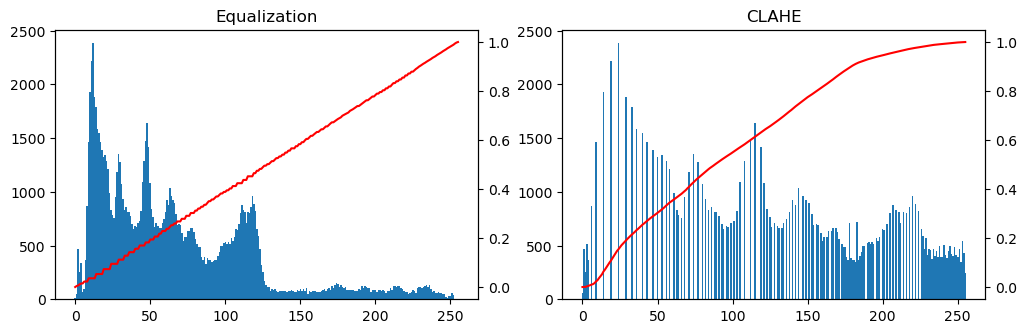

In [45]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread("images/tsukuba.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img3 = clahe.apply(img)

hist1 = histogram(img2)
cumsum_hist1 = np.cumsum(hist1)
sum_hist1 = np.sum(hist1)

hist2 = histogram(img3)
cumsum_hist2 = np.cumsum(hist2)
sum_hist2 = np.sum(hist2)

plt.figure(figsize=(12,3.5))
plt.subplot(121)
plt.bar(x=range(256), height=histogram(img), width=1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist1/sum_hist1, 'r')
plt.title("Equalization")

plt.subplot(122)
plt.bar(x=range(256), height=histogram(img2), width=1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist2/sum_hist2, 'r')
plt.title("CLAHE")
plt.show()

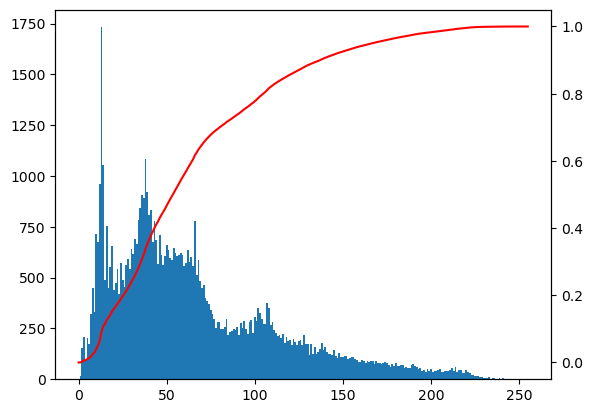

In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img2 = clahe.apply(img)

hist = histogram(img2)
cv2.imshow('CLAHE', np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

cumsum_hist = np.cumsum(hist)
sum_hist = np.sum(hist)
plt.bar(range(256), hist, width=1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist/sum_hist, 'r')
plt.show()

In [1]:
# 컬러 이미지의 CLAHE

import cv2
img = cv2.imread("images/flower1.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)

#configure CLAHE
clahe = cv2.createCLAHE(clipLimit=10,tileGridSize=(8,8))

#0 to 'L' channel, 1 to 'a' channel, and 2 to 'b' channel
img[:,:,0] = clahe.apply(img[:,:,0])

img = cv2.cvtColor(img, cv2.COLOR_Lab2RGB)

cv2.imshow("image", img)
cv2.waitKey(0)
cv2.imwrite("images/flower.jpg", img)
cv2.destroyAllWindows()

## 완벽하게 평평한 히스토그램 이퀄라이제이션
### 히스토그램 평탄화(flatening)

In [47]:
import cv2

#### SortedPixel

In [48]:
class SortedPixel():
    def __init__(self, x, y, weight):
        self.x = x
        self.y = y
        self.weight = weight
    
    def get_weight(self):
        return self.weight
    
    def __str__(self):
        return f"{x}, {y}, {weight}"

In [49]:
s1 = SortedPixel(1,2,5)
s2 = SortedPixel(1,2,8)
s3 = SortedPixel(1,2,2)
s4 = SortedPixel(1,2,7)
L1 = [s1, s2, s3, s4]

In [50]:
L1

In [51]:
L1.sort(key=lambda obj: obj.get_weight())

In [52]:
L1

#### get_weight

In [53]:
import numpy as np
def get_weight(pixels, x, y):
    weight = 0
    xm = x-1
    ym = y-1
    xp = x+1
    yp = y+1
    d = np.zeros(8, dtype=int)
    height, width = pixels.shape
    
    if (xm < 0):
        xm = x
    if (ym < 0):
        ym = y
    if (xp >= width):
        xp = x
    if (yp >= height):
        yp = y
        
    d[0] = pixels[ym, xm];    d[1] = pixels[ym, x];     d[2] = pixels[ym, xp]
    d[3] = pixels[y,  xm];                              d[4] = pixels[y,  xp]
    d[5] = pixels[yp, xm];    d[6] = pixels[yp, x];     d[7] = pixels[yp, xp]

    weight = np.sum(d)

    return weight;

#### sort_by_weight() 

In [54]:
      
def sort_by_weight(pixels, level, count):
    height, width = pixels.shape
    data = []
    inum = 0
    weight = 0
    
    for y in range(height):
        for x in range(width):
            try:
                if(pixels[y,x]==level):
                    w = get_weight(pixels, x, y)
                    data.append(SortedPixel(x, y, w))
                    inum = inum + 1
            except:
                pass
            
    from operator import attrgetter
    data.sort(key=attrgetter('weight')) # weight를 이용해 리스트의 인스턴스를 정렬

    return data

#### flatening()

In [55]:
def flatening(img):
    height, width = img.shape
    img_in = img.copy()
    img_out = np.zeros(img.shape, dtype=np.uint8)
    histogram = np.zeros(256, dtype=int) # 화소를 수를 저장해야 함
    
    for y in range(height):
        for x in range(width):
            histogram[img_in[y,x]] = histogram[img_in[y,x]] + 1
    
    low = 255  # 현재 평균화소로 옮겨지는 단계
    high = 255
    delta = 0 # 주위 화소 레벨에 따라 선택되는 화소 수
    avg_pixel_count = (int)((height*width)/256) #평탄화 후의 1농도 레벨의 화소 수

    for i in range(255,-1,-1) :
        sum = 0
        while (sum < avg_pixel_count):
            sum = sum + histogram[low]
            low = low - 1
        
        low = low + 1
        delta = histogram[low]-(sum-avg_pixel_count); #평균화 하고 남은 화소값 유지하기 위해
        buffer = sort_by_weight(img_in, low, histogram[low])
        
        if (low<high):
            for y in range(height):
                for x in range(width):
                    if (img_in[y,x] >= low+1) & (img_in[y,x] <= high) :
                        img_out[y,x] = i
                        
        for j in range(delta):
            img_out[int(buffer[j].y), int(buffer[j].x)] = i
            img_in[int(buffer[j].y), int(buffer[j].x)] = low+1

        histogram[low] = histogram[low] - delta
        high = low
        
    return img_out

#### 실행

In [56]:
img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = flatening(img)

In [57]:
cv2.imshow("Image Flatening", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

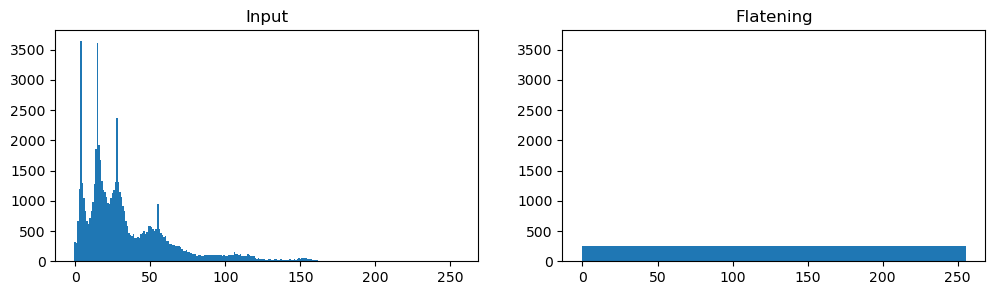

In [58]:
hist1 = cv2.calcHist(images=[img], channels=[0], mask=None, 
                    histSize=[256], ranges=[0,256]) # 원본 이미지
hist2 = cv2.calcHist(images=[img2], channels=[0], mask=None, 
                    histSize=[256], ranges=[0,256]) # 히스토그램 평탄화 이미지

plt.figure(figsize=(12,3))
plt.subplot(121)
plt.bar(x=range(256), height=hist1.flatten(), width=1)
y_lim = plt.ylim()
plt.title("Input")
plt.subplot(122)
plt.bar(x=range(256), height=hist2.flatten(), width=1)
plt.ylim(y_lim)
plt.title("Flatening")
plt.show()

In [59]:
import cv2

img = cv2.imread("images/tsukuba.png", cv2.IMREAD_GRAYSCALE)
img2 = flatening(img)

In [60]:
cv2.imshow("Image Flatening", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

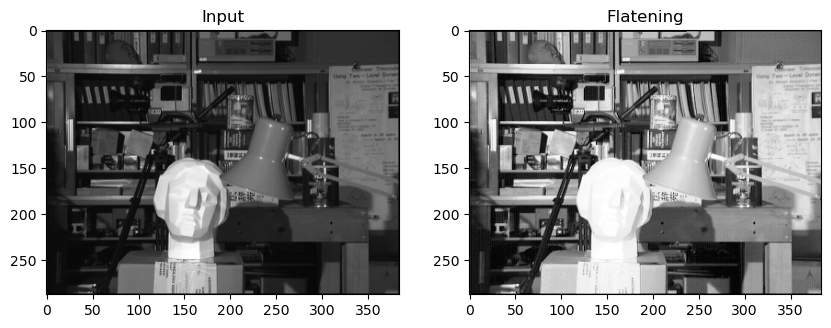

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(img, cmap="gray"); plt.title("Input")
plt.subplot(122); plt.imshow(img2, cmap="gray"); plt.title("Flatening")
plt.show()

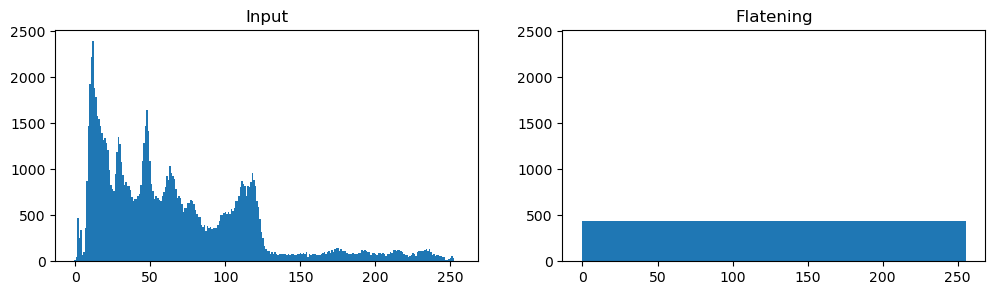

In [62]:
hist1 = cv2.calcHist(images=[img], channels=[0], mask=None, 
                    histSize=[256], ranges=[0,256]) # 원본 이미지
hist2 = cv2.calcHist(images=[img2], channels=[0], mask=None, 
                    histSize=[256], ranges=[0,256]) # 히스토그램 평탄화 이미지

plt.figure(figsize=(12,3))
plt.subplot(121)
plt.bar(x=range(256), height=hist1.flatten(), width=1)
y_lim = plt.ylim()
plt.title("Input")
plt.subplot(122)
plt.bar(x=range(256), height=hist2.flatten(), width=1)
plt.ylim(y_lim)
plt.title("Flatening")
plt.show()

In [63]:
# hist2.flatten()

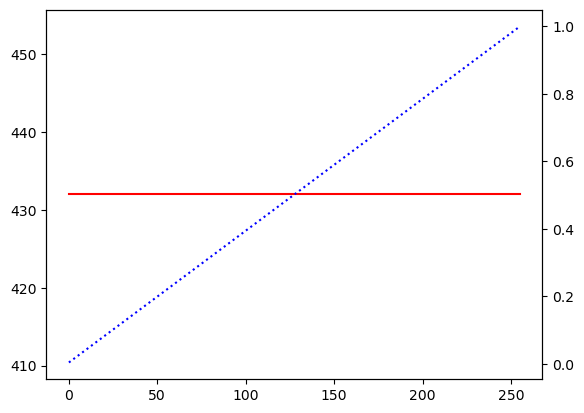

In [64]:
import cv2

hist2 = cv2.calcHist(images=[img2], channels=[0], mask=None, 
                     histSize=[256], ranges=[0,256])

cumsum_hist = np.cumsum(hist2)
sum_hist = np.sum(hist2)
plt.plot(range(256), hist2, 'r')
ax = plt.twinx()
ax.plot(range(256), cumsum_hist/sum_hist, 'b:')
plt.show()

## 스캐치 이미지 만들기

In [65]:
import cv2
import numpy as np
 
cap = cv2.VideoCapture(0) # 카메라 장치 연결 

while cap.isOpened():
    ret, frame = cap.read()     # 프레임 읽기 
 
    # 그레이스케일 이미지로 변경 
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 잡음 제거를 위해 가우시안 플러 필터 적용 
    img_gray = cv2.GaussianBlur(img_gray, (9,9), 0)

    # 라플라시안 필터로 엣지 검출 
    edges = cv2.Laplacian(img_gray, -1, None, 5)

    # 스레시홀드로 경계만 남기고 제거하면서 화면 반전 
    ret, sketch = cv2.threshold(edges, 70, 255, cv2.THRESH_BINARY_INV)
 
    # 경계선 자연스럽게 하기위해 미디언 블러 필터 적용 
    sketch = cv2.medianBlur(sketch, 5)

    # 그레이 스케일에서 BGR 컬러 스케일로 변경 
    img_sketch = cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)

    # 컬러 이미지 선명성을 없애기 위해 평균 블러 필터 적용 
    img_paint = cv2.blur(frame, (10,10))

    # 컬러 영상과 스케치 영상과 합성    
    img_paint = cv2.bitwise_and(img_paint, img_paint, mask=sketch)

    # 결과 출력, 컬러 이미지이므로 np.c_[] 사용 안 됨 
    merged = np.hstack((img_sketch, img_paint))
    cv2.imshow('Sketch Camera', merged)
    if cv2.waitKey(1) == 27: 
        break 
cap.release()
cv2.destroyAllWindows()

In [66]:
import cv2
import numpy as np

# 카메라 장치 연결
cap = cv2.VideoCapture(0)   
while cap.isOpened():
    # 프레임 읽기
    ret, frame = cap.read()
    # 속도 향상을 위해 영상크기를 절반으로 축소
#     frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    if cv2.waitKey(1) == 27: # esc키로 종료
        break
    # 그레이 스케일로 변경    
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 잡음 제거를 위해 가우시안 플러 필터 적용(라플라시안 필터 적용 전에 필수)
    img_gray = cv2.GaussianBlur(img_gray, (9,9), 0)
    # 라플라시안 필터로 엣지 검출
    edges = cv2.Laplacian(img_gray, -1, None, 5)
    # 스레시홀드로 경계 값 만 남기고 제거하면서 화면 반전(흰 바탕 검은 선)
    ret, sketch = cv2.threshold(edges, 70, 255, cv2.THRESH_BINARY_INV)
    
    # 경계선 강조를 위해 침식 연산
#     kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    kernel = np.array([[0,1,0],[1,1,1],[0,1,0]], dtype=np.uint8)
#    sketch = cv2.erode(sketch, kernel)
    # 경계선 자연스럽게 하기 위해 미디언 블러 필터 적용
    sketch = cv2.medianBlur(sketch, 5)
    # 그레이 스케일에서 BGR 컬러 스케일로 변경
    img_sketch = cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)

    # 컬러 이미지 선명선을 없애기 위해 평균 블러 필터 적용
    img_paint = cv2.blur(frame, (10,10) )
    # 컬러 영상과 스케치 영상과 합성
    img_paint = cv2.bitwise_and(img_paint, img_paint, mask=sketch)
    
    # 결과 출력
    merged = np.hstack((img_sketch, img_paint)) # 컬러이므로 np.c_[] 사용 안됨
    cv2.imshow('Sketch Camera', merged)
    
cap.release()
cv2.destroyAllWindows()